In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import scipy.stats as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm

# СРАВНЕНИЕ СРЕДНИХ ЗНАЧЕНИЙ (ДИСПЕРСИОННЫЙ АНАЛИЗ)

Есть приложение по доставке готовых продуктов. Было проведено 2 теста:
В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый.

Первое тестирование

In [3]:
task_1=pd.read_csv('5_task_1.csv')
task_2=pd.read_csv('5_task_2.csv')

In [ ]:
#group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
#events – сколько блюд суммарно было заказано за период

In [4]:
#подготовка данных для стат методов
A=task_1.query('group=="A"').events
B=task_1.query('group=="B"').events
C=task_1.query('group=="C"').events

In [13]:
#Проверяю, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.
sp.levene(A,B,C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

p-value > 0.05, не отклоняем нулевую гипотезу

In [ ]:
Также убедимся, что данные распределены нормально, применив тест Шапиро-Уилка.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


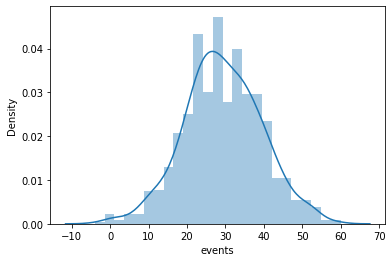

In [6]:
x=task_1[task_1['group'] == 'A']['events'].sample(1000, random_state=17)
sns.distplot(x)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


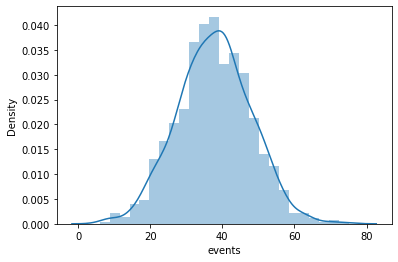

In [7]:
y=task_1[task_1['group'] == 'B']['events'].sample(1000, random_state=17)
sns.distplot(y)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


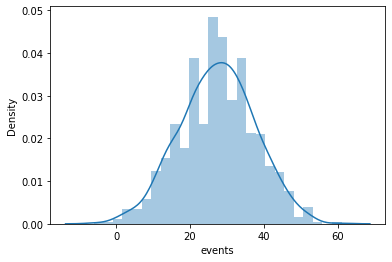

In [8]:
z=task_1[task_1['group'] == 'C']['events'].sample(1000, random_state=17)
sns.distplot(z)

Во всех трех группах (А,В,С) данные распределены нормально.

Для сравнения средних в данном случае (так как групп больше чем 2) я использую однофакторный дисперсионный анализ (F_ONEWAY)
H0 ​ ни одно из выборочных средних не отличается от другого (нет различий)
H1 ​ хотя бы одно выборочное среднее отличается от других (есть различия как минимум между двумя группами)

In [21]:
sp.f_oneway(A,B,C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

pvalue равняется 0.0, следовательно мы отклоняем нулевую гипотезу и оставляем гипотезу H1 (есть различия)
Теперь использую критерий Тьюки и определю, между какими группами есть статистически значимые различия. 

In [34]:
tukey_test = pairwise_tukeyhsd(task_1["events"], task_1["group"] )

In [36]:
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


group1 и group2 — названия групп, которые сравниваются в рамках теста.
meandiff — разница между значением 2 группы и значением 1 группы.
p-adj — скорректированный порог значимости.
lower и upper — нижняя и верхняя границы доверительного интервала различий в средних.
reject — отвергается нулевая гипотеза или нет.

все нулевые гипотезы были отклонены, поэтому мы делаем вывод, что средние всех трёх групп значимо различаются.
в столбце meandiff можно обнаружить самые значимые отличия - делаем вывод, что будем показывать новые квадратные картинки.

Второе тестирование
Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [40]:
task_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [ ]:
#segment – сегмент (high/low)
#group – вид кнопки (control – старая версия, test – новая версия)
#events – сколько блюд суммарно было заказано за период

In [ ]:
Так как в данных внутри каждой из групп есть разбивка по сегменту, то буду пользоваться многофакторный дисперсионным анализом.

In [43]:
#визуализирую распределение events для контрольной и тестовой групп.
test_group=task_2.query('group=="test"')
control_group=task_2.query('group=="control"')

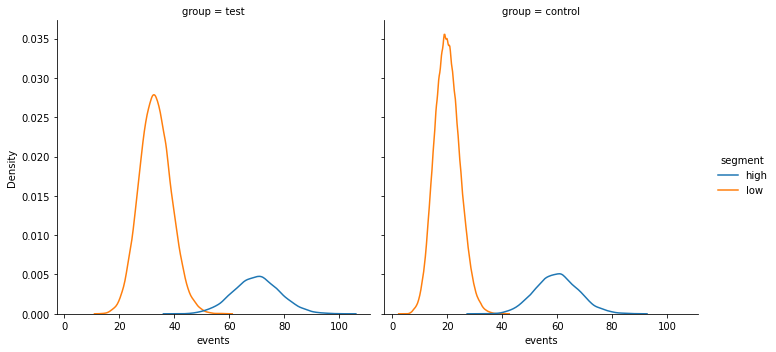

In [47]:
sns.displot(data=task_2, x="events", hue="segment", col="group", kind="kde")

In [53]:
#для каждой группы посмотрим среднее, медиану и стандартное отклонение
test_group_high=test_group.query('segment=="high"')
test_group_low=test_group.query('segment=="low"')
control_group_high=control_group.query('segment=="high"')
control_group_low=control_group.query('segment=="low"')

In [54]:
test_group_high.describe()

,id,events
count,10000.000000,10000.000000
mean,50126.620600,69.938500
std,28821.133487,8.403974
min,14.000000,40.000000
25%,25317.500000,64.000000
50%,50234.500000,70.000000
75%,74783.250000,76.000000
max,99996.000000,102.000000


In [55]:
test_group_low.describe()

,id,events
count,40000.000000,40000.000000
mean,49913.343600,33.025925
std,28917.383492,5.720845
min,1.000000,13.000000
25%,24763.750000,29.000000
50%,49706.500000,33.000000
75%,75127.250000,37.000000
max,99995.000000,59.000000


In [56]:
control_group_high.describe()

,id,events
count,10000.000000,10000.000000
mean,50473.978200,59.970800
std,28761.438914,7.805347
min,10.000000,31.000000
25%,25612.500000,55.000000
50%,51031.000000,60.000000
75%,75261.250000,65.000000
max,99976.000000,89.000000


In [57]:
control_group_low.describe()

,id,events
count,40000.000000,40000.000000
mean,49935.256700,20.031575
std,28855.849243,4.473576
min,0.000000,4.000000
25%,25022.250000,17.000000
50%,49944.500000,20.000000
75%,74874.250000,23.000000
max,99999.000000,41.000000


In [ ]:
Провожу тест.

In [72]:
task_2['combination']=task_2['group'] + ' \ ' + task_2['segment']

In [73]:
task_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [103]:
mod = smf.ols(formula='events ~ segment + group + segment:group', data=task_2)

In [104]:
model = smf.ols('events ~ segment + group + segment:group', task_2).fit()

In [106]:
aov_table = anova_lm(model, typ=2)

In [107]:
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [ ]:
#По рядам: первая НП, вторая НП, взаимодействие НП и остатки.

#По колонкам:

#sum_sq - сумма квадратов
#df - степени свободы
#F - F-значение
#PR (>F) - p-значение
#Как видно по последней колонке, значим как эффект обоих факторов, так и их взаимодействие.

Использую критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [109]:
tukey_test = pairwise_tukeyhsd(task_2["events"], task_2["combination"] )

In [110]:
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,0.001,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,0.001,9.7551,10.1803,True
control \ high,test \ low,-26.9449,0.001,-27.113,-26.7768,True
control \ low,test \ high,49.9069,0.001,49.7388,50.075,True
control \ low,test \ low,12.9944,0.001,12.888,13.1007,True
test \ high,test \ low,-36.9126,0.001,-37.0807,-36.7445,True


Значимые различия обнаружились между всеми группами. Фактор group,segment и их взаимодействие – оказались значимыми.
Поэтому решение: выкатываем новую версию.